---

##  The Grover Algorithm: Implementation

_course: quantum cryptography for beginners
<br>date: 11 november 2024
<br>author: burton rosenberg_

---


In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, Pauli 
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from IPython.display import display, Math, HTML
import time, math
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')

import math
import numpy as np
import matplotlib.pyplot as plt


qiskit version: 1.1.2




### Implementing the reflection

To implement the Grover Algorithm we need to implement two refections. The oracle reflection:

$$
U_f:\;|\phi\rangle \longrightarrow \sum_i (-1)^{(i==j)}\,|i\rangle
$$

and the flip around the average,

$$
    U_{r'} = 2 |h_0\rangle\langle h_0| - I
$$

Where $h_0$ is the result of putting zero through a bank of Hadamard transfomations,

$$
  h_0 = H^{n} |0\rangle
$$

and in general the Walsh-Hadamard basis is,

$$
 h_i = H^{n} |i\rangle
$$

The vectors in this basis are remarkably a pattern of +1's and -1's that described as,

$$
H^{n} |i\rangle = \sum_j (-1)^{i\cdot j}\,|i\rangle
$$

where $i\cdot j$ is the inner product in $\mathbb{F}_2{}^n$. For $n=4$, the table of $(-1)^{i\cdot j}$ is,


|  i &bsol; j | 0 | 1 | 2 | 3 |
| ---- | ---- | ---- | ---- | ---- |
| 0 | +1 | +1 | +1 | +1 |
| 1 | +1 | -1 | +1 | -1 |
| 2 | +1 | +1 | -1 | -1 |
| 3 | +1 | -1 | -1 | +1 |

In fact, we do not reflect around $h_0$ rather around its perpendicular in the plane containing it and the vector $|j\rangle$,
the vector representing the unknown. This upsets our plan by a minus sign, as the two reflections differ by a half rotation $x\rightarrow -x$,

\begin{eqnarray}
U_r &=& -U_{r'} \\
&=& I - 2 |h_0\rangle\langle h_0|  \\
&=& \sum_i |h_i\rangle \langle h_i | - 2 |h_0\rangle\langle h_0| \\
&=& \sum_i (-1)^{i==0}\, |h_i\rangle \langle h_i | 
\end{eqnarray}

The final element is how to reflect around $|i\rangle$, expressed as,

$$
U_i  = \sum_j (-1)^{i==j}\,\,|j\rangle
$$

This is done with a controlled Z gate, applied to any qubit and controlled by all the remaining qubits. 

To reflect around $|0\rangle$, negate with an X all but one of the qubits, use Tofolli gates and ancillas as needed to logically and (classical) all the qubits, and use the result as the control to a controlled Z on the uninverted qubit. Then uncompute the anciliaries and the X negations.



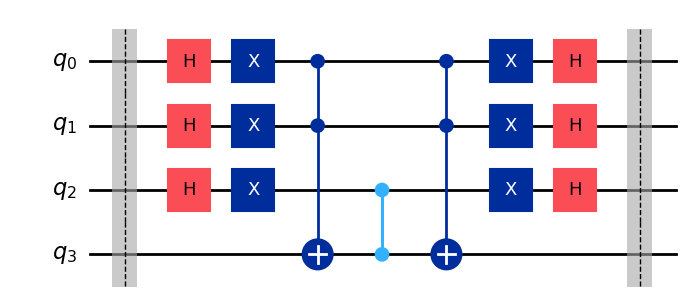

<IPython.core.display.Latex object>

True


In [36]:

# I - 2 |phi_0><phi_0|

# any output of the H except all one's should be fixed. 
# the all one's should invert (-1)
# and simple spikes should be -1/4 for all but 3/4 for the spike


np.set_printoptions(precision=2,floatmode='fixed',suppress=True)

def Ur_3(qc):
    for i in range(3):
        qc.h(i)
        qc.x(i)
    qc.ccx(0,1,3)
    qc.cz(3,2)
    qc.ccx(0,1,3)
    for i in range(3):
        qc.x(i)
        qc.h(i)
    qc.barrier()
    return qc


qc = QuantumCircuit(4)
qc.barrier()
sv = Ur_3(qc)

sv = Statevector(ur_3)
display(ur_3.draw('mpl'))
display(sv.draw('latex'))
print(sv.equiv(sv))